<font size="5">Section 5: Structural Equation Modelling</font>

## Housekeeping and Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import sklearn
import scipy 
from scipy.linalg import eigh, cholesky
from scipy.stats import norm
import linearmodels.panel as lmp
from pylab import plot, show, axis, subplot, xlabel, ylabel, grid
import semopy 
import seaborn as sns
from factor_analyzer import FactorAnalyzer
from sklearn.decomposition import PCA
from IPython.display import Image


%matplotlib inline

Example using real purchase data (from Kaggle)

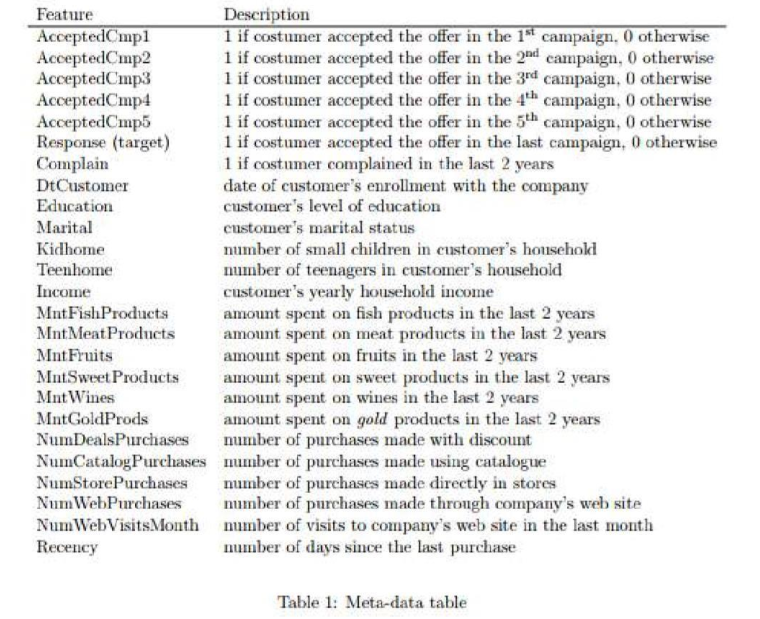

In [6]:
Image(filename='../data/dictionary.png', width=700) 

In [4]:
df=pd.read_csv('../data/ifood_df.csv')
df.describe()

,Recency,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,...,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.00000
mean,49.009070,51622.094785,0.442177,0.506576,306.164626,26.403175,165.312018,37.756463,27.128345,44.057143,...,0.257596,0.034467,0.089796,0.024490,0.504762,0.165079,0.215873,562.764626,518.707483,0.29932
std,28.932111,20713.063826,0.537132,0.544380,337.493839,39.784484,217.784507,54.824635,41.130468,51.736211,...,0.437410,0.182467,0.285954,0.154599,0.500091,0.371336,0.411520,575.936911,553.847248,0.68044
min,0.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,-283.000000,0.00000
25%,24.000000,35196.000000,0.000000,0.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,56.000000,42.000000,0.00000
50%,49.000000,51287.000000,0.000000,0.000000,178.000000,8.000000,68.000000,12.000000,8.000000,25.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,343.000000,288.000000,0.00000
75%,74.000000,68281.000000,1.000000,1.000000,507.000000,33.000000,232.000000,50.000000,34.000000,56.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,964.000000,884.000000,0.00000
max,99.000000,113734.000000,2.000000,2.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2491.000000,2458.000000,4.00000


<Axes: >

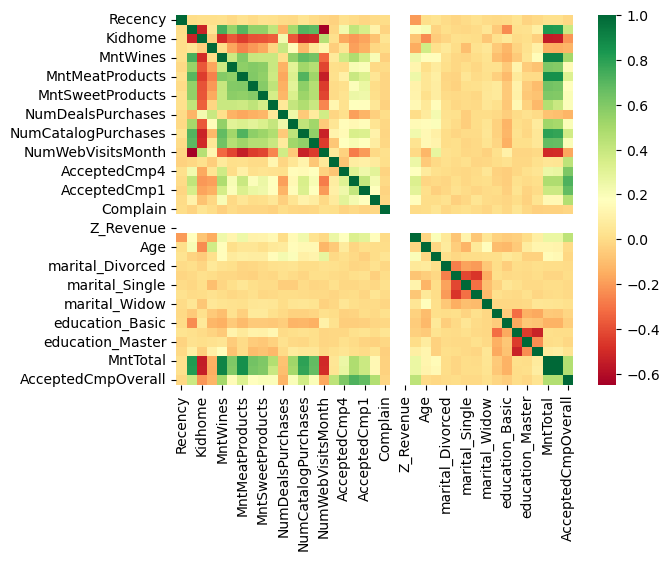

In [5]:
sns.heatmap(df.corr(), cmap='RdYlGn')

## PCA

PCA for continous variables in this example using sklearn. We can select the number of components to be estimated or use *'mle'* to determine the optimal number of eigenvalues based on the variance of the data.

Then we can report the Scree Plot that shows the percentage of variance that each component contributes. Based on the results, the data can be summarized using three components.

Finally, we can use the estimated components and transform them into a data frame. We can also show that, by construction, the components are orthogonal (zero covariance).

In [46]:
pca = PCA(n_components=13)
pca_features = pca.fit_transform(df)
print(pca.explained_variance_ratio_)

[0.29450426 0.18238083 0.09977177 0.07810933 0.06612721 0.06382277
 0.05132906 0.04380861 0.03221139 0.02940447 0.02458364 0.02070721
 0.01323945]


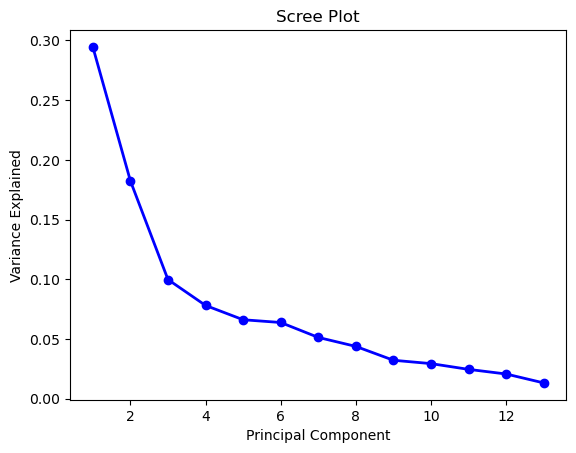

In [47]:
#scree plot using explained variance proportion

PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [51]:
pca = PCA(n_components=3)
pca_features = pca.fit_transform(df)
print(pca.explained_variance_ratio_)

[0.29450426 0.18238083 0.09977177]


In [52]:
pca_vectors = pd.DataFrame(data = pca.components_)
pca_vectors.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.113209,0.231651,0.178868,0.196377,0.188830,0.252432,-0.295672,0.291301,0.254798,0.408116,0.297746,0.297981,0.427062
1,0.005312,0.019484,0.060142,0.049555,0.032669,-0.043421,0.942059,0.086491,0.075394,0.141323,0.084334,0.142029,0.206565
2,0.090250,0.264741,0.195768,0.201958,0.296426,0.326628,0.112161,0.453620,0.082935,-0.387114,0.003397,-0.095241,-0.513743


In [53]:
pca_df = pd.DataFrame(data=pca_features,columns=['PC1', 'PC2', 'PC3'])
pca_df.describe().apply(lambda s: s.apply('{0:.3f}'.format))

,PC1,PC2,PC3
count,41854.000,41854.000,41854.000
mean,0.000,-0.000,0.000
std,1.527,1.202,0.889
min,-1.946,-3.237,-3.904
25%,-1.128,-0.755,-0.476
50%,-0.286,0.175,0.036
75%,0.811,0.847,0.467
max,11.790,4.144,5.868


In [54]:
pca_df.corr().apply(lambda s: s.apply('{0:.3f}'.format))

,PC1,PC2,PC3
PC1,1.000,-0.000,0.000
PC2,-0.000,1.000,-0.000
PC3,0.000,-0.000,1.000


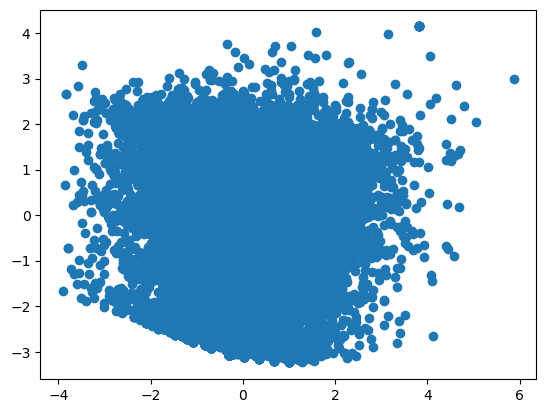

In [56]:
plt.scatter(pca_df['PC3'],pca_df['PC2'])

## EFA

EFA example using factor_analyzer library. Output shows the factor loadings for each factor, and the eigenvalues, which can be used to construct a scree plot. Number of factors can be chosen or estimated optimally from the data.

Using the semopy library we can also infer which variables belong to each factor, based on the estimated factor loadings (criteria does not restrict unique loadings to each factor). Estimated number of factors chosen optimally base on the data.

Note that semopy yields less factors than factor_analyzer. The difference is due that factor_analyzer reports factors until eigenvalues are irrelevant (variance explained), while semopy presents a potential EFA where all coeficients are statistically significant. In this case, the third factor is mainly only loading to X1 an it contributes to a small proportion of the total explained variance.

Finally semopy reports that the variance-covariance matrix in the dataframe is not positive definite, meaning that some variables are highly correlated (as expected by design), meaning that estimates are likely to be untrustworty. 

In [4]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer(rotation='promax')
fa.fit(df)

FactorAnalyzer(rotation_kwargs={})

In [5]:
fa.loadings_

array([[ 2.45844576e-02,  6.16558933e-01, -4.03537955e-02],
       [-4.02004617e-02,  5.06201575e-01,  2.30818106e-01],
       [ 2.19696856e-02,  6.66216458e-01, -4.55965233e-02],
       [-4.25932888e-04,  7.50249816e-01, -2.76110170e-02],
       [-1.59109944e-01, -2.23540245e-02,  8.78023012e-01],
       [ 7.27172364e-03,  5.07141189e-02,  5.20219732e-01],
       [-2.26544264e-02, -3.28354384e-02, -1.35790117e-01],
       [ 1.47209769e-01, -1.06293746e-01,  5.19318866e-01],
       [ 4.95408276e-01,  8.50495871e-02,  5.61791147e-02],
       [ 6.24258562e-01, -3.24905226e-02, -3.12422807e-02],
       [ 6.96619647e-01,  3.81306031e-02,  9.12180390e-03],
       [ 5.79789313e-01, -2.94617651e-02, -2.65396312e-03],
       [ 5.41304863e-01,  1.89290238e-02, -1.94874600e-02]])

In [6]:
fa.get_eigenvalues()

(array([4.15426624, 1.33653327, 1.0990827 , 0.99949323, 0.77208669,
        0.70112662, 0.69212732, 0.68408107, 0.59661363, 0.51552398,
        0.50583288, 0.48741185, 0.45582053]),
 array([ 3.57232658,  0.75916372,  0.60709025,  0.21152932,  0.08846197,
         0.06143919,  0.03102821,  0.02496555, -0.02566573, -0.06861803,
        -0.1014971 , -0.12296062, -0.17587893]))

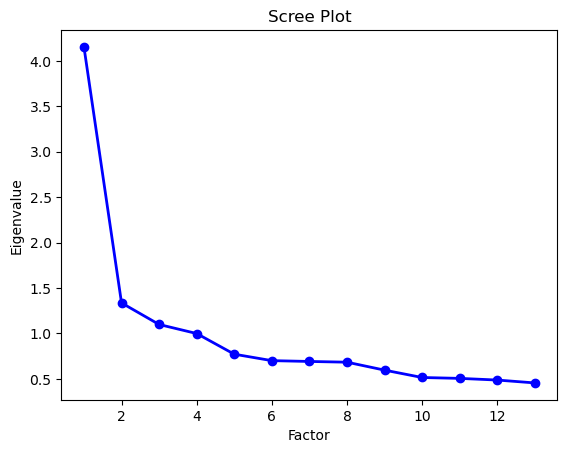

In [7]:
values = np.arange(1,14)
eigenvalues = pd.DataFrame(data=fa.get_eigenvalues())
plt.plot(values, eigenvalues.loc[0], 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Factor')
plt.ylabel('Eigenvalue')
plt.show()

In [8]:
fa.get_factor_variance()

(array([1.79982976, 1.66952157, 1.39203304]),
 array([0.13844844, 0.12842474, 0.10707946]),
 array([0.13844844, 0.26687318, 0.37395264]))

EFA example using semopy

In [9]:
print(semopy.efa.explore_cfa_model(df, pval=0.05))

eta1 =~ sk11 + sk9 + sk10 + sk12
eta2 =~ sk6 + sk7
eta3 =~ sk4 + sk2 + sk11 + sk5 + sk3 + sk9 + sk1 + sk8 + sk12
eta4 =~ sk11 + sk12 + sk13



## Latent clases

R package adapted for Python can be used, called stepmix (install with pip)

In [69]:
from stepmix.stepmix import StepMix

# Continuous StepMix Model with 3 latent classes
model = StepMix(n_components=3, measurement="categorical", verbose=1, random_state=123)

# Fit model and predict clusters
model.fit(df)
df['pred']=model.predict(df)

MODEL REPORT
    Measurement model parameters
        ------------------------------------------------------------------------
        Multinoulli model with 13 features, each with 6 possible outcomes
        ------------------------------------------------------------------------
        Columns 1 to 6 are associated with the first feature,
        columns 7 to 12 are associated with the second feature, etc.

        Class 1 : [0.0000 0.9857 0.0093 0.0038 0.0005 0.0007 0.0000 0.9012 0.0741 0.0211
 0.0020 0.0016 0.0000 0.9379 0.0373 0.0200 0.0026 0.0022 0.0000 0.9611
 0.0230 0.0123 0.0015 0.0019 0.0000 0.9521 0.0294 0.0163 0.0015 0.0007
 0.0000 0.8403 0.1103 0.0353 0.0070 0.0070 0.0000 0.0988 0.0392 0.1786
 0.2360 0.4475 0.0000 0.8494 0.0835 0.0436 0.0114 0.0120 0.0000 0.9371
 0.0365 0.0195 0.0040 0.0029 0.0000 0.6633 0.1738 0.1326 0.0196 0.0107
 0.0000 0.9494 0.0301 0.0153 0.0031 0.0021 0.0000 0.8795 0.0653 0.0398
 0.0088 0.0066 0.0000 0.7982 0.0896 0.0729 0.0212 0.0181]
        Class

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


## Latent growth

Latent growth modelling is not available on Python at this time. Example available in R for the lavaan library at https://lavaan.ugent.be/tutorial/growth.html

Latent trajectory class (growth curves and class membership) is not available on Python at this time. Example available in R using the LCTMtools library at https://rstudio-pubs-static.s3.amazonaws.com/522393_3aa7f65898f8426e9c0a92d7971b619d.html.

## General CFA

Based on the EFA results we implement a CFA using the semopy library. We declare the model, just as the suggestion in section 3, as a model object, then we declare the model and fit using the data (variable X1 not included since is not used). The output shows the optimized value of the log-likelihood, number of iterations and estimation method used. 

First, note that measurements load into multiple factors, leading to interpretation issues (specially since variables correlate negatively with one factor and positively with the other). Secondly, we observe small covariance between factors, and substatial diferences in the residual error variance across measurements (particularly large error variance in X8). Finally, we can report the fit indices of the model, which allows to compare against alternative specifications in the data.

Also, if you install the graphviz package (and python-graphviz), you can provide a visualization of the estimated model using the semplot function.

In [10]:
mod = """
# measurement model
eta1 =~ sk9 + sk10 + sk11 + sk12 + sk13
eta2 =~ sk6 + sk5 + sk4 + sk3 + sk2 + sk1
    """

model = semopy.Model(mod)
out=model.fit(df)
print(out)

Name of objective: MLW
Optimization method: SLSQP
Optimization successful.
Optimization terminated successfully
Objective value: 0.189
Number of iterations: 33
Params: 1.317 1.223 1.081 1.271 0.867 1.147 1.045 1.228 0.661 0.214 0.248 0.730 0.295 0.624 0.106 0.459 0.181 0.236 0.432 0.216 0.170 0.095 0.126


In [11]:
model.inspect(mode='list', what="names", std_est=True)

,lval,op,rval,Estimate,Est. Std,Std. Err,z-value,p-value
0,sk9,~,eta1,1.000000,0.604821,-,-,-
1,sk10,~,eta1,1.316946,0.566751,0.014949,88.097091,0.0
2,sk11,~,eta1,1.222515,0.737343,0.011897,102.758778,0.0
3,sk12,~,eta1,1.081344,0.550081,0.012544,86.20747,0.0
4,sk13,~,eta1,1.271095,0.523253,0.015306,83.047507,0.0
5,sk6,~,eta2,1.000000,0.475601,-,-,-
6,sk5,~,eta2,0.866859,0.535296,0.011753,73.75948,0.0
7,sk4,~,eta2,1.146540,0.691761,0.013735,83.477968,0.0
8,sk3,~,eta2,1.045047,0.624593,0.013083,79.875534,0.0
9,sk2,~,eta2,1.227798,0.659164,0.015003,81.838792,0.0


In [12]:
semopy.calc_stats(model)

,DoF,DoF Baseline,chi2,chi2 p-value,chi2 Baseline,CFI,GFI,AGFI,NFI,TLI,RMSEA,AIC,BIC,LogLik
Value,43,55,7911.630926,0.0,108526.24384,0.927459,0.927099,0.906755,0.927099,0.907215,0.066123,45.621941,244.386622,0.189029


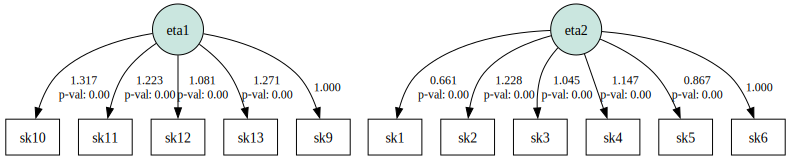

In [13]:
semopy.semplot(model, "model.png")

## Complete SEM example

SEM example considering both the measurement part and structural part in semopy (data and model provided at https://semopy.com/tutorial.html). This example presents a model where three factors are estimated from the data, where each measurement loads only into one factor. The first part of the model is as noted in section 6 (measurement only). Second part (regrssions) reports the structural relationships between factors, and the last part reports potential correlations between the error in each measure (this could be use in section 6 to improve final model). 

In [14]:
import semopy
import pandas as pd
desc = semopy.examples.political_democracy.get_model()
print(desc)

# measurement model
ind60 =~ x1 + x2 + x3
dem60 =~ y1 + y2 + y3 + y4
dem65 =~ y5 + y6 + y7 + y8
# regressions
dem60 ~ ind60
dem65 ~ ind60 + dem60
# residual correlations
y1 ~~ y5
y2 ~~ y4 + y6
y3 ~~ y7
y4 ~~ y8
y6 ~~ y8


In [15]:
data = semopy.examples.political_democracy.get_data()
mod = semopy.Model(desc)
res = mod.fit(data)

In [16]:
print(mod.inspect())

     lval  op   rval  Estimate  Std. Err    z-value   p-value
0   dem60   ~  ind60  1.482379  0.399024   3.715017  0.000203
1   dem65   ~  ind60  0.571912  0.221383   2.583364  0.009784
2   dem65   ~  dem60  0.837574  0.098446   8.507992       0.0
3      x1   ~  ind60  1.000000         -          -         -
4      x2   ~  ind60  2.180494  0.138565  15.736254       0.0
5      x3   ~  ind60  1.818546  0.151993   11.96465       0.0
6      y1   ~  dem60  1.000000         -          -         -
7      y2   ~  dem60  1.256819  0.182687   6.879647       0.0
8      y3   ~  dem60  1.058174  0.151521   6.983699       0.0
9      y4   ~  dem60  1.265186  0.145151   8.716344       0.0
10     y5   ~  dem65  1.000000         -          -         -
11     y6   ~  dem65  1.185743  0.168908   7.020032       0.0
12     y7   ~  dem65  1.279717  0.159996    7.99841       0.0
13     y8   ~  dem65  1.266084  0.158238   8.001141       0.0
14  dem60  ~~  dem60  3.950849  0.920451   4.292296  0.000018
15  dem6

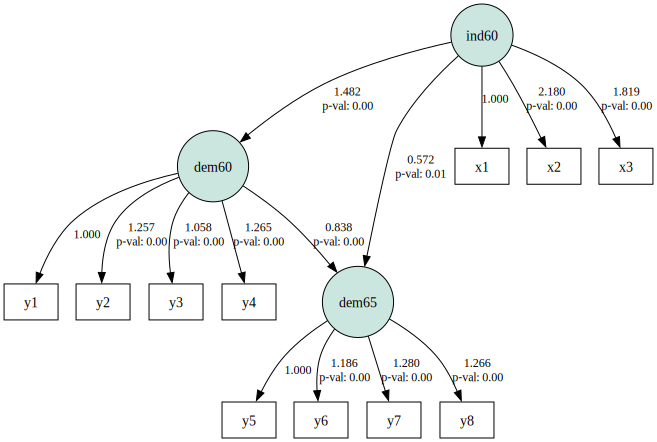

In [17]:
semopy.semplot(mod, "semmodel.png")

<font size="3">**Tarea 3**</font>

<u> *Instrucciones* </u>

Los resultados de los ejericicios propuestos se deben entregar como un notebook por correo electronico a *juancaros@udec.cl* el dia 9/6 hasta las 21:00. Es importante considerar que el código debe poder ejecutarse en cualquier computadora con la data original del repositorio. Recordar la convencion para el nombre de archivo ademas de incluir en su documento titulos y encabezados por seccion. Utilizar la base de datos *ifood_df.csv*. 

Como se indica en la Tabla 1, las variables describen el comportamiento de un set de consumidores en una tienda de retail. Las variables categoricas (e.g. educacion, estado civil) ya han sido convertidas a variables binarias (una por cada categoria). 

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import sklearn
import scipy 
from scipy.linalg import eigh, cholesky
from scipy.stats import norm
import linearmodels.panel as lmp
from pylab import plot, show, axis, subplot, xlabel, ylabel, grid
from sklearn.preprocessing import StandardScaler
import semopy 
import seaborn as sns
from factor_analyzer import FactorAnalyzer
from sklearn.decomposition import PCA
from IPython.display import Image


%matplotlib inline

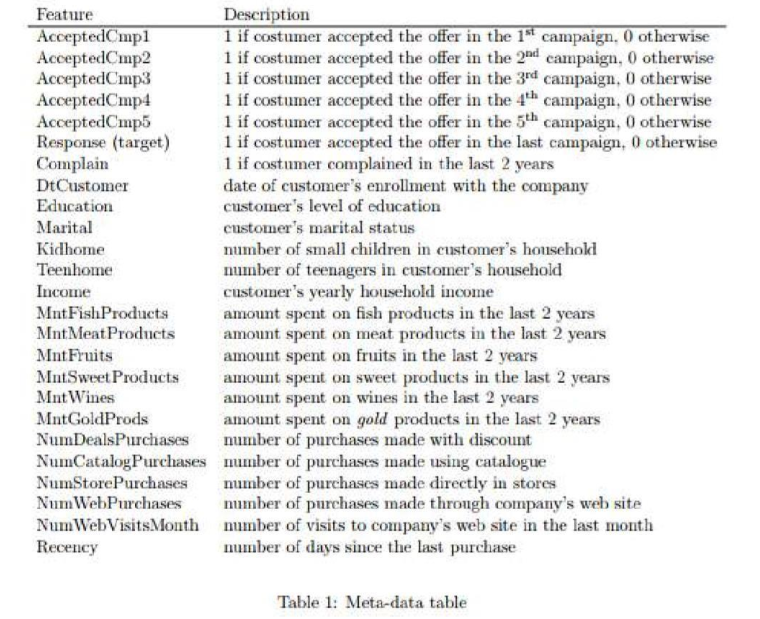

In [7]:
Image(filename='../data/dictionary.png', width=600, height=900, unconfined=True) 

Preguntas:

1. Cargue la base de datos y realice los ajustes necesarios para su uso (missing values, recodificar variables, etcetera). Identifique los tipos de datos que se encuentran en la base, realice estadisticas descriptivas sobre las variables importantes (Hint: Revisar la distribuciones, datos faltantes, outliers, etc.) y limpie las variables cuando sea necesario.

**R:** Las variables estan balancedas, aproximadas a valores enteros, sin perdida de informacion. Variables como educacion y estado marital estan expresadas de forma binaria.

In [14]:
df_store=pd.read_csv('../data/ifood_df.csv')
df_store.dtypes

Recency                 int64
Income                  int64
Kidhome                 int64
Teenhome                int64
MntWines                int64
MntFruits               int64
MntMeatProducts         int64
MntFishProducts         int64
MntSweetProducts        int64
MntGoldProds            int64
NumDealsPurchases       int64
NumWebPurchases         int64
NumCatalogPurchases     int64
NumStorePurchases       int64
NumWebVisitsMonth       int64
AcceptedCmp3            int64
AcceptedCmp4            int64
AcceptedCmp5            int64
AcceptedCmp1            int64
AcceptedCmp2            int64
Complain                int64
Z_CostContact           int64
Z_Revenue               int64
Response                int64
Age                     int64
Customer_Days           int64
marital_Divorced        int64
marital_Married         int64
marital_Single          int64
marital_Together        int64
marital_Widow           int64
education_2n Cycle      int64
education_Basic         int64
education_

2. Realice un PCA usando las variables de numero de compras y cantidad gastada en los diversos items. En particular, identifique los valores propios y determine el numero optimo de componentes. Luego estime y grafique la distribucion de los componentes. Ademas discuta la importancia relativa de las variables sobre cada uno de los componentes estimados. Que se puede concluir de este analisis?

**R:** El analisis muestra tres compononentes principales que contribuyen informacion significativa al analisis (sobre las variables estandarizadas). El segundo y tercer componente aumentan su varianza en funcion de los valores del primero. A la inversa, valores negativos de PC1 se asocian a una menor varianza en PC2 y PC3.

In [112]:
df=df_store[['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts'
                ,'MntGoldProds','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases',
                'NumStorePurchases']]
df.describe()

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000
mean,306.164626,26.403175,165.312018,37.756463,27.128345,44.057143,2.318367,4.100680,2.645351,5.823583
std,337.493839,39.784484,217.784507,54.824635,41.130468,51.736211,1.886107,2.737424,2.798647,3.241796
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000
50%,178.000000,8.000000,68.000000,12.000000,8.000000,25.000000,2.000000,4.000000,2.000000,5.000000
75%,507.000000,33.000000,232.000000,50.000000,34.000000,56.000000,3.000000,6.000000,4.000000,8.000000
max,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000


<AxesSubplot:>

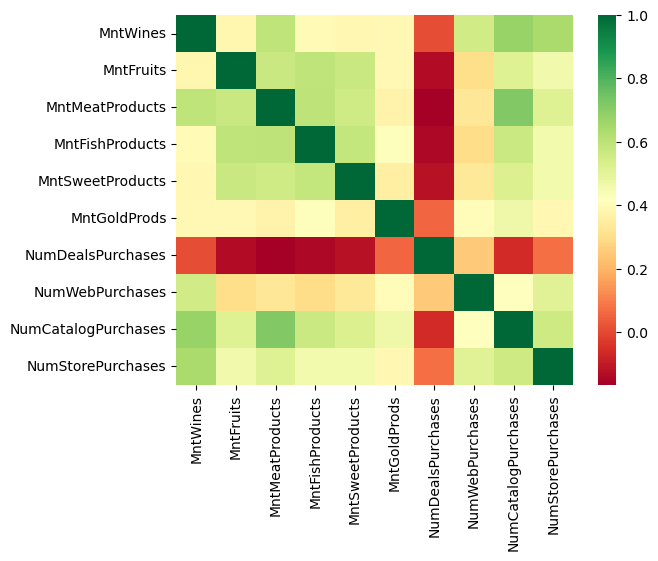

In [16]:
sns.heatmap(df.corr(), cmap='RdYlGn')

In [67]:
scaler = StandardScaler()
df_st = scaler.fit_transform(df)
pca = PCA(n_components=8)
pca_features = pca.fit_transform(df)
print(pca.explained_variance_ratio_)

[8.06886286e-01 1.56527924e-01 1.74127928e-02 9.58296648e-03
 5.41714601e-03 4.07760213e-03 3.90496989e-05 2.46915096e-05]


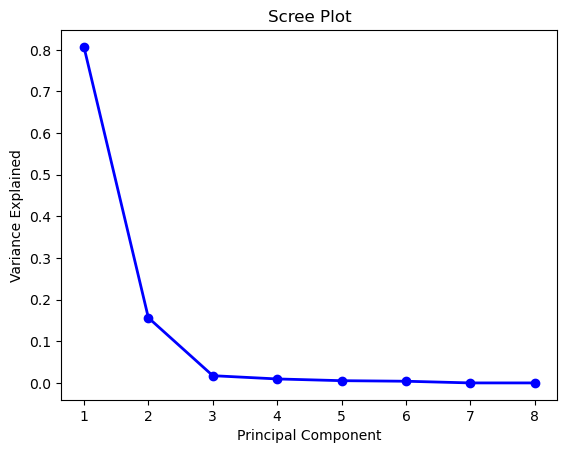

In [26]:
#scree plot using explained variance proportion

PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [27]:
pca = PCA(n_components=8)
pca_features = pca.fit_transform(df_st)
print(pca.explained_variance_ratio_)

[0.48773352 0.13832059 0.07850407 0.06503529 0.05361044 0.04440343
 0.04082509 0.03921513]


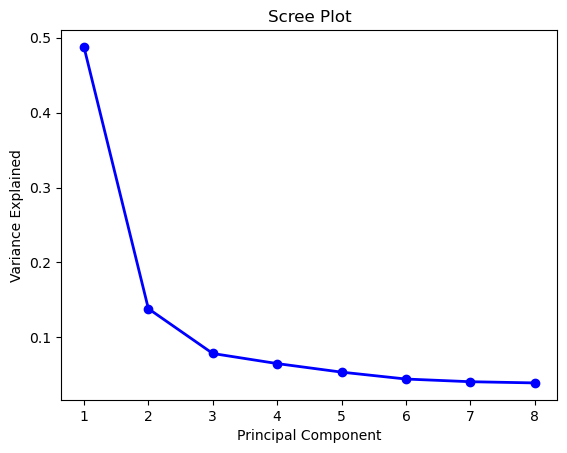

In [28]:
#scree plot using explained variance proportion (standarized data)

PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

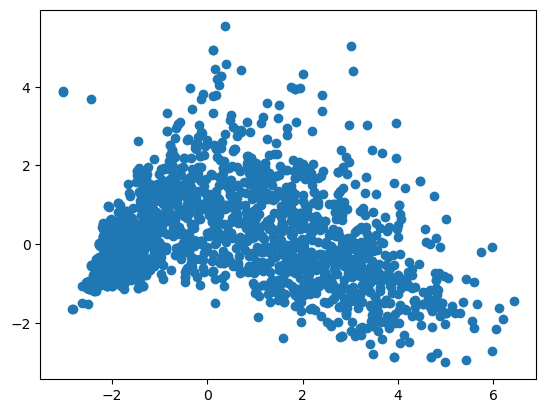

In [117]:
pca_df = pd.DataFrame(data=pca_features,columns=['PC1', 'PC2', 'PC3'])
plt.scatter(pca_df['PC1'],pca_df['PC2'])

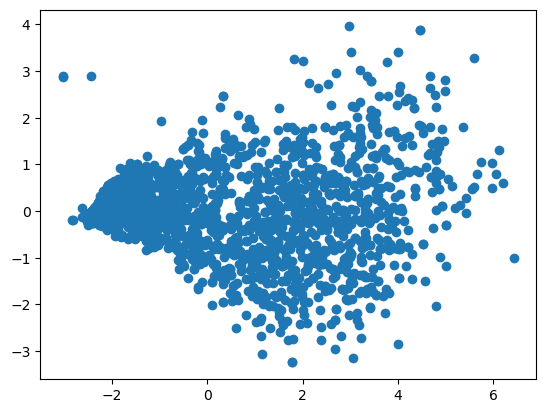

In [118]:
plt.scatter(pca_df['PC1'],pca_df['PC3'])

3. Con los resultados de la Pregunta 2, mantenga los primeros 3 componentes principales y repita el analisis. Graficamente y estadisticamente indique si existen diferencias o relaciones significativas entre los valores de los PCA y las siguientes variables: Income, Kidhome, Education y Recency. Que puede concluir de los resultados?

**R:** Mayores valores en PC1 se asocian a una menor probabilidad de tener hijos e ingreso mas alto. No se observan patrones obvios por educacion o Recency. En otras palabras, los componentes estimados correlacionan con algunas de las variables demograficas pero no se asocian a la latencia desde la ultima compra.

In [113]:
pca = PCA(n_components=3)
pca_features = pca.fit_transform(df_st)
print(pca.explained_variance_ratio_)

[0.48773352 0.13832059 0.07850407]


In [114]:
pca_vectors = pd.DataFrame(data = pca.components_)
pca_vectors.head()

,0,1,2,3,4,5,6,7,8,9
0,0.345652,0.329467,0.367261,0.339410,0.328118,0.279623,-0.026615,0.273978,0.378615,0.341941
1,0.209308,-0.228660,-0.180425,-0.237768,-0.204254,0.145564,0.696183,0.475368,-0.012596,0.202743
2,-0.507871,0.322237,-0.197585,0.304310,0.279365,0.432519,0.385171,-0.033853,-0.212138,-0.216711


In [119]:
pca_df = pd.DataFrame(data=pca_features,columns=['PC1', 'PC2', 'PC3'])
features = df_store[['Income','Kidhome','education_Master','Recency']]
pca_df = pd.concat([pca_df, features], axis=1, join='inner')

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

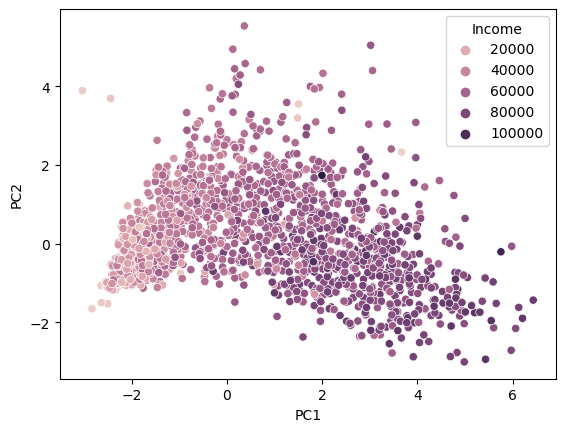

In [39]:
sns.scatterplot(data=pca_df, y='PC2' , x='PC1', hue='Income')

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

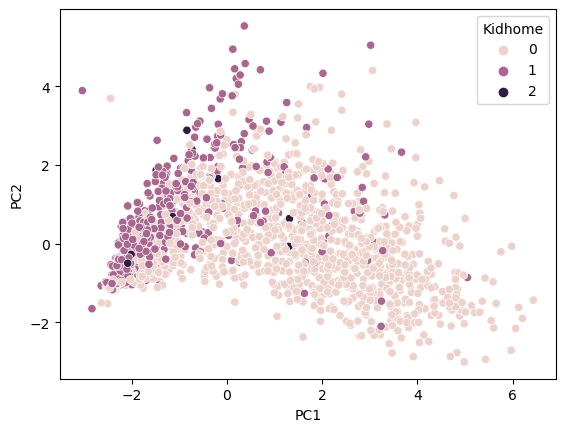

In [40]:
sns.scatterplot(data=pca_df, y='PC2' , x='PC1', hue='Kidhome')

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

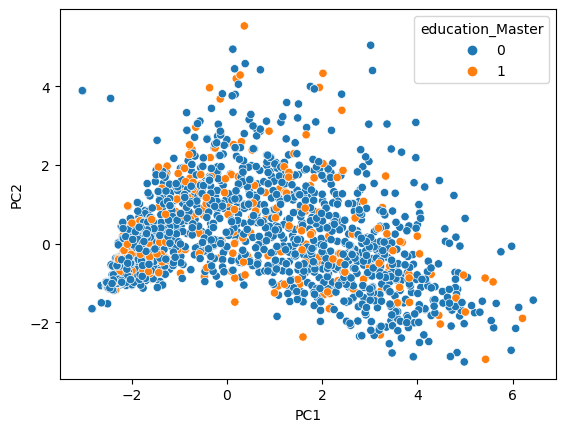

In [41]:
sns.scatterplot(data=pca_df, y='PC2' , x='PC1', hue='education_Master')

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

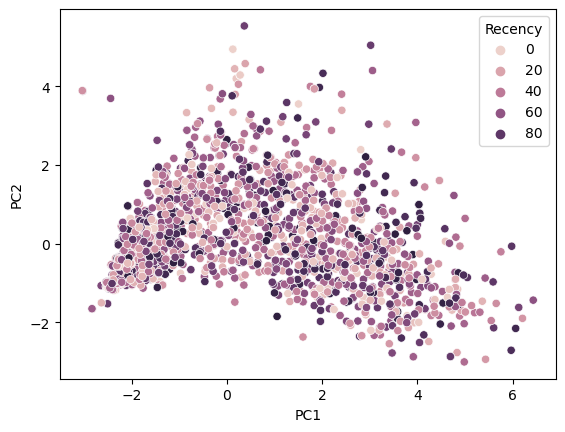

In [42]:
sns.scatterplot(data=pca_df, y='PC2' , x='PC1', hue='Recency')

<AxesSubplot:xlabel='PC3', ylabel='PC2'>

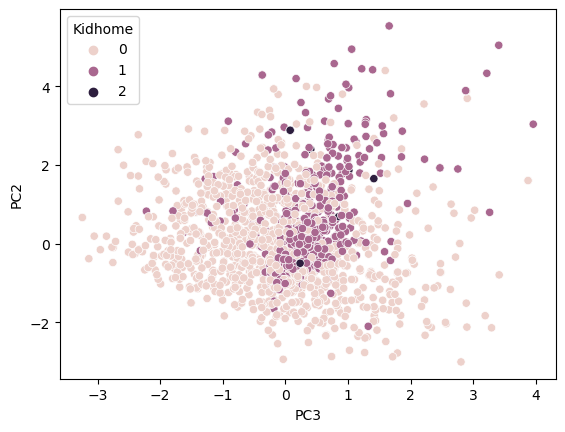

In [124]:
sns.scatterplot(data=pca_df, y='PC2' , x='PC3', hue='Kidhome')

<AxesSubplot:xlabel='PC3', ylabel='PC2'>

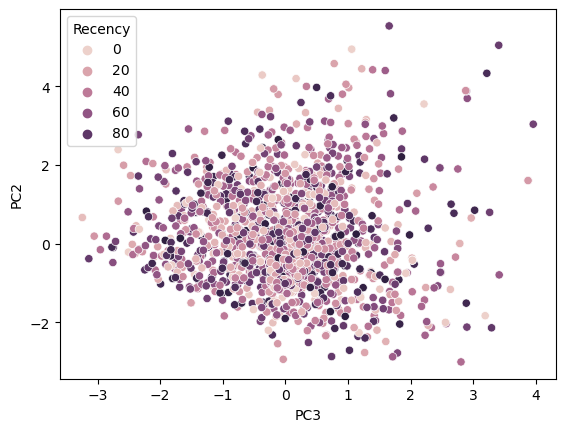

In [122]:
sns.scatterplot(data=pca_df, y='PC2' , x='PC3', hue='Recency')

4. A partir del mismo set de variables de la pregunta 2 realice un EFA. En particular determine el numero optimo de factores y las variables que se asocian a cada factor. Tambien discuta si existen variables que no son informativas.

**R:** El analisis exploratorio sugiere la presencia de un factor dominante y al menos dos que podrian ser relevantes para resumir la data. Los resultados se confirman en ambos metodos usados (considerando tambien la data estandarizada). NumDealsPurchases no parece contribuir informacion relevante al modelo, lo cual es consistente con el analisis de la matriz de correlacion.

In [126]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer(rotation='oblimax', method='ml')
fa.fit(df)
fa.get_factor_variance()

(array([4.47466619, 0.86347937, 0.42355804]),
 array([0.44746662, 0.08634794, 0.0423558 ]),
 array([0.44746662, 0.53381456, 0.57617036]))

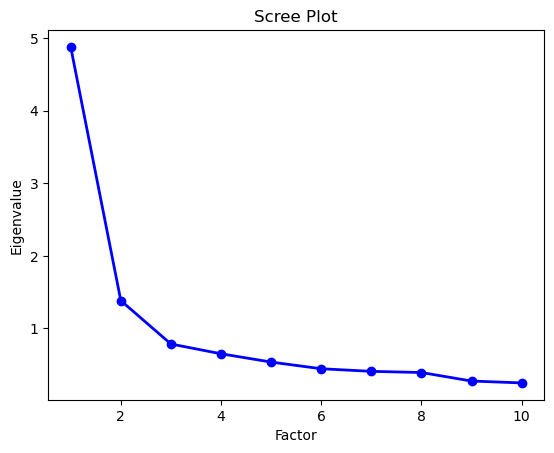

In [127]:
values = np.arange(1,11)
eigenvalues = pd.DataFrame(data=fa.get_eigenvalues())
plt.plot(values, eigenvalues.loc[0], 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Factor')
plt.ylabel('Eigenvalue')
plt.show()

In [128]:
fa.loadings_

array([[ 0.80043827,  0.34055811, -0.20095447],
       [ 0.65877455, -0.32850053,  0.17176946],
       [ 0.79909929, -0.21501984, -0.17281919],
       [ 0.6876218 , -0.36019325,  0.15478428],
       [ 0.6568856 , -0.29468963,  0.17865296],
       [ 0.54571807,  0.01609312,  0.21622698],
       [-0.04979688,  0.40588141,  0.2937617 ],
       [ 0.58839609,  0.42634552,  0.3323678 ],
       [ 0.82784434, -0.0359942 , -0.13257965],
       [ 0.7247583 ,  0.16943277,  0.08266383]])

In [129]:
print(semopy.efa.explore_cfa_model(df, pval=0.05))

eta1 =~ MntMeatProducts + MntFishProducts + MntFruits + MntSweetProducts + MntWines + MntGoldProds



In [130]:
df_st = pd.DataFrame(df_st)
df_st.columns=df.columns.values
print(semopy.efa.explore_cfa_model(df_st, pval=0.05))

eta1 =~ NumCatalogPurchases + MntMeatProducts + MntWines + NumStorePurchases + MntFishProducts + MntFruits + MntSweetProducts + MntGoldProds + NumWebPurchases



5. Con los resultados obtenidos en la Pregunta 4, proponga un CFA donde cada variable solo se asocia con un factor. Entregue un nombre a cada factor que representa el concepto comun entre todas las variables. Reporte la importancia de cada medida (variable) a cada factor e indique la correlacion entre factores.

**R:** Existen dos posibles modelos, uno con un solo factor asociado a todas las variables, o separarlas entre volumen de ventas ($) y numero de compras. Ambos modelos presentan indices de ajuste bastante similar, sin embargo el modelo con un factor es marginalmente mejor.

In [133]:
mod1 = """
# measurement model
eta1 =~ NumCatalogPurchases + MntMeatProducts + MntWines + NumStorePurchases + MntFishProducts + MntFruits + MntSweetProducts + MntGoldProds + NumWebPurchases
    """
model1 = semopy.Model(mod1)
out1=model1.fit(df_st)

mod2 = """
# measurement model
eta1 =~ NumCatalogPurchases + NumStorePurchases + NumWebPurchases 
eta2 =~ MntSweetProducts + MntFruits + MntGoldProds + MntMeatProducts + MntWines + MntFishProducts 
    """
model2 = semopy.Model(mod2)
out2=model2.fit(df_st)

semopy.calc_stats(model1)

,DoF,DoF Baseline,chi2,chi2 p-value,chi2 Baseline,CFI,GFI,AGFI,NFI,TLI,RMSEA,AIC,BIC,LogLik
Value,27,36,1348.869551,0.0,9995.859047,0.86728,0.865057,0.820076,0.865057,0.82304,0.149041,34.776536,137.349226,0.611732


In [134]:
semopy.calc_stats(model2)

,DoF,DoF Baseline,chi2,chi2 p-value,chi2 Baseline,CFI,GFI,AGFI,NFI,TLI,RMSEA,AIC,BIC,LogLik
Value,26,36,1348.26636,0.0,9995.859047,0.86724,0.865118,0.81324,0.865118,0.816179,0.151903,36.777083,145.048256,0.611459


In [86]:
model2.inspect(mode='list', what="names", std_est=True)

,lval,op,rval,Estimate,Est. Std,Std. Err,z-value,p-value
0,NumCatalogPurchases,~,eta1,1.000000,0.826345,-,-,-
1,NumStorePurchases,~,eta1,0.992432,0.708492,0.027294,36.3609,0.0
2,NumWebPurchases,~,eta1,0.645663,0.546314,0.024451,26.406824,0.0
3,MntSweetProducts,~,eta2,1.000000,0.673737,-,-,-
4,MntFruits,~,eta2,0.965670,0.686074,0.033319,28.982536,0.0
5,MntGoldProds,~,eta2,1.072912,0.629672,0.039987,26.831396,0.0
6,MntMeatProducts,~,eta2,6.069227,0.741230,0.195641,31.022294,0.0
7,MntWines,~,eta2,8.842049,0.720203,0.292272,30.252839,0.0
8,MntFishProducts,~,eta2,1.383461,0.705803,0.04655,29.71997,0.0
9,eta2,~~,eta2,784.665136,1.000000,45.47588,17.254534,0.0


6. Finalmente, implemente un SEM completo usando la estructura propuesta en la Pregunta 5. En particular, estime un modelo donde los factores explican la variable Response, junto con otras variables demograficas que existen en la base de datos. Ademas utilice dichas variables relevantes para explicar los factores latentes si lo considera apropiado. Las variables a incluir en el modelo final deben tener sustento teorico y el modelo final debe optimizar el ajuste a los datos, en base a los criterios vistos en clase. Que puede concluir en base a sus resultados?

**R:** Siguiendo la estructura de la Pregunta 5, se presentan dos modelos donde se relacionan las variables demograficas y Recency para explicar la variable Repsonse. Se permite que las variables demograficas tambien puedan afectar los factores latentes. Se estima un modelo con un factor y uno con dos factores. Los resultados muestran diferencias marginales entre ambos modelos, sin embargo los coeficientes del modelo de dos factores no son correctos, lo cual favorece al modelo de un factor.

Adicionalmente, se observa que el mejor modelo aun tiene un importante error de prediccion, segun los indices relevantes (RMSEA, CFI, TLI), lo cual puede deberse a la naturaleza binaria de la variable Response. En su interpretacion, podriamos considerar *eta1* como *intensidad de compra*, siendo una combinacion de frecuencia y volumen. La intensidad de compra crece con el ingreso pero disminuye con el numero de hijos y nivel educacional. Asimismo, la probabilidad de responder a las publicidades (Response=1) depende positivamente de la intensidad de compra y del numero de hijos, mientras que decrece con el ingreso y Recency (tiempo desde la ultima compra).

In [106]:
df_cfa = pd.concat([df, features], axis=1, join='inner')
df_cfa = pd.concat([df_cfa, df_store['Response']], axis=1, join='inner')
df_cfa.describe()

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Income,Kidhome,education_Master,Recency,Response
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.00000
mean,306.164626,26.403175,165.312018,37.756463,27.128345,44.057143,2.318367,4.100680,2.645351,5.823583,51622.094785,0.442177,0.165079,49.009070,0.15102
std,337.493839,39.784484,217.784507,54.824635,41.130468,51.736211,1.886107,2.737424,2.798647,3.241796,20713.063826,0.537132,0.371336,28.932111,0.35815
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1730.000000,0.000000,0.000000,0.000000,0.00000
25%,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,35196.000000,0.000000,0.000000,24.000000,0.00000
50%,178.000000,8.000000,68.000000,12.000000,8.000000,25.000000,2.000000,4.000000,2.000000,5.000000,51287.000000,0.000000,0.000000,49.000000,0.00000
75%,507.000000,33.000000,232.000000,50.000000,34.000000,56.000000,3.000000,6.000000,4.000000,8.000000,68281.000000,1.000000,0.000000,74.000000,0.00000
max,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,113734.000000,2.000000,1.000000,99.000000,1.00000


In [107]:
mod3 = """
# measurement model
eta1 =~ NumCatalogPurchases + NumStorePurchases + NumWebPurchases
eta2 =~ MntSweetProducts + MntFruits + MntGoldProds + MntMeatProducts + MntWines + MntFishProducts 

# regressions
Response ~ eta1 + eta2 + Recency + Income + Kidhome + education_Master 
eta1 ~ Income + Kidhome  
eta2 ~ eta1 + Income + Kidhome + education_Master
    """
model3 = semopy.Model(mod3)
out3=model3.fit(df_cfa)

mod4 = """
# measurement model
eta1 =~ NumCatalogPurchases + MntMeatProducts + MntWines + NumStorePurchases + MntFishProducts + MntFruits + MntSweetProducts + MntGoldProds + NumWebPurchases

# regressions
Response ~ eta1 + Recency + Income + Kidhome 
eta1 ~ Income + Kidhome + education_Master
    """
model4 = semopy.Model(mod4)
out4=model4.fit(df_cfa)

semopy.calc_stats(model3)

,DoF,DoF Baseline,chi2,chi2 p-value,chi2 Baseline,CFI,GFI,AGFI,NFI,TLI,RMSEA,AIC,BIC,LogLik
Value,74,95,2077.457114,0.0,15935.027153,0.873519,0.86963,0.832632,0.86963,0.837626,0.110833,60.115685,236.768652,0.942157


In [108]:
model3.inspect(mode='list', what="names", std_est=True)

,lval,op,rval,Estimate,Est. Std,Std. Err,z-value,p-value
0,eta1,~,Income,0.000084,0.762670,0.000002,41.590226,0.0
1,eta1,~,Kidhome,-1.073052,-0.253249,0.070662,-15.185748,0.0
2,eta2,~,eta1,15.938540,1.297938,1.425787,11.178764,0.0
3,eta2,~,Income,-0.000328,-0.242856,0.000118,-2.772412,0.005564
4,eta2,~,Kidhome,7.155884,0.137529,1.813481,3.945938,0.000079
5,eta2,~,education_Master,-3.809386,-0.050614,0.93531,-4.072859,0.000046
6,NumCatalogPurchases,~,eta1,1.000000,0.812977,-,-,-
7,NumStorePurchases,~,eta1,1.047646,0.735502,0.026826,39.052803,0.0
8,NumWebPurchases,~,eta1,0.668904,0.556204,0.024267,27.563856,0.0
9,MntSweetProducts,~,eta2,1.000000,0.692821,-,-,-


In [109]:
semopy.calc_stats(model4)

,DoF,DoF Baseline,chi2,chi2 p-value,chi2 Baseline,CFI,GFI,AGFI,NFI,TLI,RMSEA,AIC,BIC,LogLik
Value,79,95,2144.235044,0.0,15935.027153,0.869619,0.865439,0.838186,0.865439,0.843213,0.108909,50.055116,198.215668,0.972442


In [110]:
model4.inspect(mode='list', what="names", std_est=True)

,lval,op,rval,Estimate,Est. Std,Std. Err,z-value,p-value
0,eta1,~,Income,0.000084,0.755056,0.000002,43.403761,0.0
1,eta1,~,Kidhome,-0.927183,-0.215658,0.061988,-14.957427,0.0
2,eta1,~,education_Master,-0.246102,-0.039573,0.074258,-3.314137,0.000919
3,NumCatalogPurchases,~,eta1,1.000000,0.825750,-,-,-
4,MntMeatProducts,~,eta1,73.868689,0.742276,1.865846,39.58992,0.0
5,MntWines,~,eta1,111.569640,0.733645,2.863827,38.958238,0.0
6,NumStorePurchases,~,eta1,1.030893,0.734352,0.026427,39.009694,0.0
7,MntFishProducts,~,eta1,16.233881,0.695108,0.448059,36.231539,0.0
8,MntFruits,~,eta1,11.404750,0.683068,0.322086,35.409047,0.0
9,MntSweetProducts,~,eta1,11.857536,0.685201,0.33351,35.553792,0.0


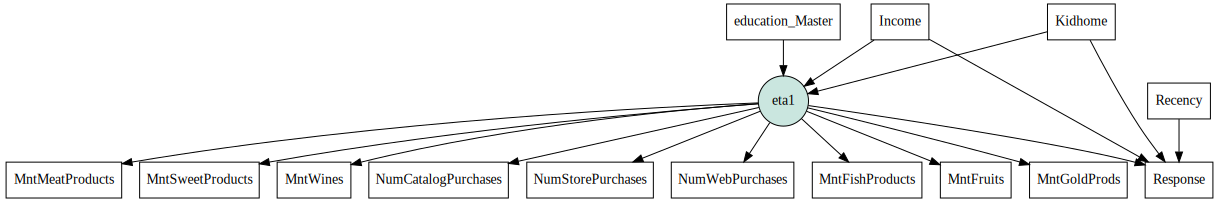

In [111]:
semopy.semplot(mod4, "semtarea3.png")